**Importing Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib as mpl
import matplotlib.pyplot as plt
!pip install py7zr
from keras.preprocessing.image import load_img,img_to_array
from py7zr import unpack_7zarchive
import shutil
import os
shutil.register_unpack_format('7zip', ['.7z'], unpack_7zarchive)

     |████████████████████████████████| 65 kB 755 kB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 357 kB 56.4 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 61.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 58.6 MB/s eta 0:00:01


**Getting the Dataset**

In [2]:
shutil.unpack_archive('/kaggle/input/cifar-10/train.7z', '/kaggle/working')
train_dir = os.listdir("./train");
train_dir_len = len(train_dir)

In [3]:
Train_Labels = pd.read_csv('/kaggle/input/cifar-10/trainLabels.csv')
Train_Images = pd.DataFrame(columns = ['id','label','path'],dtype=str)

In [4]:
path_base = '/kaggle/working/train/'

for index in range(0,train_dir_len):
    path = path_base + str(index+1)+'.png'
    if os.path.exists(path):
        Train_Images = Train_Images.append([{ 'id': str(Train_Labels['id'].iloc[index]),'path': path, 'label':Train_Labels['label'].iloc[index]}])

In [5]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
for name in  class_names:
    index = class_names.index(name)
    Train_Images.loc[Train_Images.label==name,'label'] = str(index)

In [6]:
train_data_generator = ImageDataGenerator(
            rescale=1./255.,
            validation_split=0.2,
            horizontal_flip=True
            )

**We have 50,000 images of 10 classes.There 5,000 images of each of the 10 classes hence the distrbution of data is uniform**

In [7]:
train_generator = train_data_generator.flow_from_dataframe(dataframe=Train_Images,
            directory="./train/",
            x_col="path",
            y_col="label",
            subset="training",
            batch_size=500,
            shuffle=True,
            target_size=(32,32),
            class_mode="categorical")

Found 40000 validated image filenames belonging to 10 classes.


In [8]:
validation_generator = train_data_generator.flow_from_dataframe(dataframe=Train_Images,
            directory="./train/",
            x_col="path",
            y_col="label",
            subset="validation",
            batch_size=500,
            shuffle=True,
            target_size=(32,32),
            class_mode="categorical")

Found 10000 validated image filenames belonging to 10 classes.


In [9]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

**Using a Convolutional Neural Network for Image Classification**

> **L2 regularizer is used along with Dropout for regularization**

In [11]:
from tensorflow.keras.regularizers import l2
from keras.models import Sequential
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=[32,32,3]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(200, activation='elu'))
model.add(BatchNormalization())
model.add(Dense(100, activation='elu'))
model.add(BatchNormalization())
model.add(Dense(50,  activation='elu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(20, activation='elu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

**Using Adam optimizer and Categorical Crossentropy as loss function**

In [12]:
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

**Training the model**

In [13]:
history = model.fit(train_generator, steps_per_epoch=(40000//500),epochs= 100,
                    validation_data=validation_generator, validation_steps=(10000//500))

Epoch 1/100
80/80 [==============================] - 21s 158ms/step - loss: 2.5103 - accuracy: 0.1891 - val_loss: 3.5395 - val_accuracy: 0.1132
Epoch 2/100
80/80 [==============================] - 12s 151ms/step - loss: 1.9270 - accuracy: 0.3581 - val_loss: 3.4108 - val_accuracy: 0.1129
Epoch 3/100
80/80 [==============================] - 13s 159ms/step - loss: 1.6810 - accuracy: 0.4600 - val_loss: 2.9693 - val_accuracy: 0.1682
Epoch 4/100
80/80 [==============================] - 12s 149ms/step - loss: 1.5228 - accuracy: 0.5368 - val_loss: 1.9073 - val_accuracy: 0.4147
Epoch 5/100
80/80 [==============================] - 12s 145ms/step - loss: 1.4043 - accuracy: 0.5823 - val_loss: 1.7699 - val_accuracy: 0.4688
Epoch 6/100
80/80 [==============================] - 12s 150ms/step - loss: 1.3196 - accuracy: 0.6184 - val_loss: 1.2719 - val_accuracy: 0.6085
Epoch 7/100
80/80 [==============================] - 12s 145ms/step - loss: 1.2306 - accuracy: 0.6494 - val_loss: 1.0780 - val_accuracy:

**The accuracy on 40,000 train set is around : 91.30%
  The accuracy on 10,000 validation set is around 87.95:**

**Visulization of the model's performance**

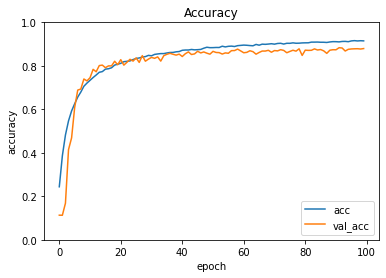

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0.00, 1.00])
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

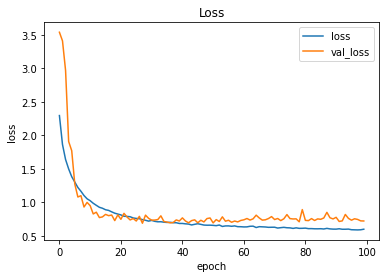

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
if os.path.exists("./test"):
    shutil.rmtree("./test")
if os.path.exists("./train"):
    shutil.rmtree("./train")
if not os.path.exists("./data"):
    os.mkdir("./data")
shutil.unpack_archive('/kaggle/input/cifar-10/test.7z', '/kaggle/working/data')
test_dir = os.listdir("./data/test");
test_dir_len = len(test_dir)

In [ ]:
test_data_generator = ImageDataGenerator(rescale=1./255.)
test_generator = test_data_generator.flow_from_directory(directory='/kaggle/working/data',
            batch_size=500,
            shuffle=False,color_mode='rgb',
            target_size=(32,32),
            class_mode=None)

In [ ]:
predict_test = model.predict_generator(test_generator)

In [ ]:
predict_generator = np.argmax(predict_test, axis=1)
predict_generator[:2],[class_names[int(i)] for i in predict_generator[:2]]

In [ ]:
submission = pd.DataFrame(columns = ['id','label'],dtype=str)
submission["label"] = [class_names[int(i)] for i in predict_generator]
submission["id"] = [ (''.join(filter(str.isdigit, name ))) for name in test_generator.filenames]

In [ ]:
submission.to_csv("submission7.csv",index=False)